# Exploratory Data Analysis of Categorical Columns and Problem Definition.

We already have an integrated dataset of Indonesia COE, and now we dig in to the dataset to seek any problems that will later be discussed and validated with a coffee specialist.

In case there are any needs for data alteration, we will note them in the conclusion and do the adjusment in the next stage as a result of the coffee specialist's advice.

## Read the Data.

In [4]:
import pandas as pd

# Define the folder path
data_path = "/home/er_bim/Indonesia_COE/data/processed/cleaned/"

# Load the data
df = pd.read_csv(data_path + 'coe_indonesia.csv', index_col=0)

# Check the data sample by random rows
df.sample(6)


,Year,Rank,Score,Farm,Farmer,Region,Process,Variety_1,Variety_2,Variety_3,Variety_4,Weight (Lbs),High Bid (US$),Total Value (US$),Buyer
66,2023,15,87.82,Wanoja Coffee Plot Satrea Amambi,Satrea Amambi,Jawa Barat,Natural,Ateng,S-795,Sigararutang,NaN,584.53,10.9,6371.377,M.I.Coffee Corporation
60,2023,9,88.38,PT. De Gayo Agri Indonesia,Fauziah,Aceh,Natural,Ateng,NaN,NaN,NaN,573.95,11.8,6772.610,Sulalat Coffee Trading
9,2021,10,88.15,Lereng Gunung Argopuro Krucil,Dinul Haq Sabyli,Jawa Timur,Natural,Cobra,Typica,NaN,NaN,427.70,24.2,10350.340,Herd Coffee Roaster. CARA Instant Coffee. Besk...
61,2023,10,88.15,Finca De Berman,Diki Wahyudin,Jawa Barat,Honey Anaerobic,S-795,Ateng,NaN,NaN,608.65,9.0,5477.850,"Wataru & Co., Ltd."
50,2023,1B,91.41,Ijen Lestari,Dandy Dharmawan,Jawa Timur,Carbonic Maceration Natural,USDA 762,Kartika,NaN,NaN,391.19,43.6,17055.884,SAVAYA Coffee Market – USA WAVY Coffee Roaster...
31,2022,5,89.15,Koperasi Ribang Gayo Musara,Dimas Apriandi,Aceh,Washed,Ateng,P-88,NaN,NaN,793.66,13.5,10714.410,Kyokuto Fadie Corporation


## Basic and Descriptive EDA.

In [5]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# display the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# display column names, to get an idea of what data is available.
print(f"Column names in the dataset:\n{df.columns}\n")

# data types
print("Data types of each column in the dataset:")
print(df.dtypes)


The dataset contains 74 rows and 15 columns.

Column names in the dataset:
Index(['Year', 'Rank', 'Score', 'Farm', 'Farmer', 'Region', 'Process',
       'Variety_1', 'Variety_2', 'Variety_3', 'Variety_4', 'Weight (Lbs)',
       'High Bid (US$)', 'Total Value (US$)', 'Buyer'],
      dtype='object')

Data types of each column in the dataset:
Year                   int64
Rank                  object
Score                float64
Farm                  object
Farmer                object
Region                object
Process               object
Variety_1             object
Variety_2             object
Variety_3             object
Variety_4             object
Weight (Lbs)         float64
High Bid (US$)       float64
Total Value (US$)    float64
Buyer                 object
dtype: object


In [7]:
# null value occurrence
print(f"The null value occurrence in each column are: \n{df.isnull().sum()}")

The null value occurrence in each column are: 
Year                  0
Rank                  0
Score                 0
Farm                  0
Farmer                0
Region                0
Process               0
Variety_1             0
Variety_2            16
Variety_3            46
Variety_4            66
Weight (Lbs)          0
High Bid (US$)        0
Total Value (US$)     0
Buyer                 0
dtype: int64


The null values occur in the dataset due to the separation of column "Variety" in the data wrangling stage. 

The multi-variety coffee is composed of a maximum of four varieties.

In [8]:
print("Summary statistics for categorical columns:")
df.astype('object').describe()

Summary statistics for categorical columns:


,Year,Rank,Score,Farm,Farmer,Region,Process,Variety_1,Variety_2,Variety_3,Variety_4,Weight (Lbs),High Bid (US$),Total Value (US$),Buyer
count,74,74,74.00,74,74,74,74,74,58,28,8,74.00,74.0,74.000,74
unique,3,32,54.00,55,57,7,14,17,15,13,4,48.00,61.0,73.000,53
top,2021,17,87.62,Koperasi Ribang Gayo Musara,Dandy Dharmawan,Aceh,Natural,Ateng,P-88,Bourbon,Typica,562.18,10.2,11964.525,"Wataru & Co., Ltd."
freq,26,3,4.00,10,3,32,28,27,13,5,3,6.00,3.0,2.000,12


## The Column "Farm"

### Unique values evaluation.

In [9]:
print(f"There are {df['Farm'].nunique()} farms that contribute to the Indonesia COE, which are: \n\n{df['Farm'].unique()}")

There are 55 farms that contribute to the Indonesia COE, which are: 

['Pantan Musara' 'Ibun Ita' 'Ijen Lestari' 'Ibun Yudi'
 'Koperasi Koerintji Barokah' 'Avatara Gayo' 'Kamojang' 'Topidi'
 'Lereng Gunung Argopuro Krucil' 'PT Sulotco Jaya Abadi'
 'Malabar Mountain Coffee' 'Baru Dadap Petak 46' 'Ketapanrame' 'Sukaramai'
 'Batukaang' 'Angin-angin' 'Gravfarm Sukaratu' 'Papandayan'
 'LPE Kelola Agro' 'Sarongge' 'Bukit Sama' 'Wajamala' 'HT Farm'
 'Koperasi Ribang Gayo Musara' 'Pegasing Takengon Utara'
 'Frinsa Weninggalih' 'Panangan Mata Takengon Utara' 'Terang Ulen'
 'Ceding Ayu, Pantan Musara' 'Renggali' 'Koerintji Barokah Group'
 'Koerintji Farm' 'Ijen' 'Avatara Coffee' 'Tunas Baru Farm'
 'Dasimah bukit sama' 'Jaya Tani Farm' 'Avarata Coffee'
 'Central Sumatera Coffee' 'Wanoja Coffee Plot Hj. Eti Sumiati'
 'Atang Jungket' 'Rantekarua Coffee Plantation PT. Sulotco Jaya Abadi'
 'PT. De Gayo Agri Indonesia' 'Finca De Berman' 'Pelage Coffee'
 'Bengkolan Dua Farm' 'Blok Emper' 'Wanoja Coffee

From the list of farms, I found several values that could be suspected of being the same entity because of name similarity.

Let's break them down.

#### Musara

In [52]:
dilen = df[df['Farmer'].str.contains('dilen', case=False, na=False)]
dilen

,Year,Rank,Score,Farm,Farmer,Region,Process,Variety_1,Variety_2,Variety_3,Variety_4,Weight (Lbs),High Bid (US$),Total Value (US$),Buyer
0,2021,1,89.28,Pantan Musara,Dilen Ali Gogo,Aceh,Honey,Ateng,Gayo 1,P88,NaN,462.97,80.0,37037.600,Wataru for YAMATOYA COFFEE
34,2022,8,88.50,Koperasi Ribang Gayo Musara,Dilen Ali Gogo,Aceh,Honey,Ateng,P-88,Bourbon,NaN,793.66,10.7,8492.162,Kyokuto Fadie Corporation


In [10]:
musara = df[df['Farm'].str.contains('musara', case=False, na=False)]
musara[['Year', 'Farm', 'Farmer', 'Region']]

,Year,Farm,Farmer,Region
0,2021,Pantan Musara,Dilen Ali Gogo,Aceh
2,2021,Pantan Musara,Roberto Bagus Syahputra,Aceh
22,2021,Pantan Musara,Zakiah,Aceh
26,2022,Koperasi Ribang Gayo Musara,Bahagia Ginting,Aceh
27,2022,Koperasi Ribang Gayo Musara,Bahagia Ginting,Aceh
30,2022,Koperasi Ribang Gayo Musara,Zakiah,Aceh
31,2022,Koperasi Ribang Gayo Musara,Dimas Apriandi,Aceh
33,2022,Koperasi Ribang Gayo Musara,Asman Arianto,Aceh
34,2022,Koperasi Ribang Gayo Musara,Dilen Ali Gogo,Aceh
36,2022,"Ceding Ayu, Pantan Musara",Drs Hamdan,Aceh


"Pantan Musara" and "Koperasi Ribang Gayo Musara" probably refer to the same farm, because the farmers listed in "Pantan Musara" farm at 2021 are listed in "Koperasi Ribang Gayo Musara" at 2022.

#### Avatara and avarata.

In [11]:
avatara = df[df['Farm'].str.contains('avatara|avarata', case=False, na=False)]
avatara[['Year', 'Farm', 'Farmer', 'Region']]

,Year,Farm,Farmer,Region
6,2021,Avatara Gayo,Drs Hamdan,Aceh
42,2022,Avatara Coffee,Hendra Maulizar,Aceh
55,2023,Avarata Coffee,Hendra Maulizar,Aceh


"Avarata Coffee" is most likely a spelling error from "Avatara Coffee" because it was done by the same farmer, while "Avatara Gayo" is probably a different entity.

#### Koerintji

In [12]:
koerintji = df[df['Farm'].str.contains('koerintji', case=False, na=False)]
koerintji[['Year', 'Farm', 'Farmer', 'Region']]

,Year,Farm,Farmer,Region
5,2021,Koperasi Koerintji Barokah,Triyono,Jambi
38,2022,Koerintji Barokah Group,Abdul Aziz Thohari,Jambi
39,2022,Koerintji Farm,Ahmad Abi Sodik,Jambi


All of the farms listed above are probably the same entity because "Koerintji" is a specific name.

#### Takengon

In [13]:
takengon = df[df['Farm'].str.contains('takengon', case=False, na=False)]
takengon[['Year', 'Farm', 'Farmer', 'Region']]

,Year,Farm,Farmer,Region
28,2022,Pegasing Takengon Utara,PT. Biji Kopi Internusa,Aceh
32,2022,Panangan Mata Takengon Utara,Christian,Aceh


The farms listed above are probably different entities; "Takengon Utara" indicates those are located in the same area, while "Pegasing" and "Panangan Mata" are the distinct farm names. 

#### Wanoja

In [14]:
wanoja = df[df['Farm'].str.contains('wanoja', case=False, na=False)]
wanoja[['Year', 'Farm', 'Farmer', 'Region']]

,Year,Farm,Farmer,Region
57,2023,Wanoja Coffee Plot Hj. Eti Sumiati,Hj. Eti Sumiati,Jawa Barat
66,2023,Wanoja Coffee Plot Satrea Amambi,Satrea Amambi,Jawa Barat
67,2023,Wanoja Coffee Plot Ita Rosita,Ita Rosita,Jawa Barat


The farms listed above are surely the same entity that was done by the different farmers.

#### Sulotco

In [15]:
sulotco = df[df['Farm'].str.contains('sulotco', case=False, na=False)]
sulotco[['Year', 'Farm', 'Farmer', 'Region']]

,Year,Farm,Farmer,Region
11,2021,PT Sulotco Jaya Abadi,Samuel Karundeng,Sulawesi Selatan
59,2023,Rantekarua Coffee Plantation PT. Sulotco Jaya ...,Samuel Karundeng,Sulawesi Selatan


The farms listed above are surely the same entity, but I am not sure which one to use as the name of the farm, "Rantekarua Coffee Plantation" or "PT. Sulotco Jaya Abadi".

#### Weninggalih

In [16]:
weninggalih = df[df['Farm'].str.contains('weninggalih', case=False, na=False)]
weninggalih[['Year', 'Farm', 'Farmer', 'Region']]

,Year,Farm,Farmer,Region
29,2022,Frinsa Weninggalih,Yasmin Nabila Salsabila,Jawa Barat
68,2023,Weninggalih,Yasmin Nabila Salsabila,Jawa Barat


The farms listed above are surely the same entity, but I am not sure which one to use as the name of the farm, "Frinsa Weninggalih" or "Weninggalih".

In [17]:
ijen = df[df['Farm'].str.contains('ijen', case=False, na=False)]
ijen[['Year', 'Farm', 'Farmer', 'Region']]

,Year,Farm,Farmer,Region
3,2021,Ijen Lestari,Dandy Darmawan,Jawa Timur
41,2022,Ijen,Dandy Dharmawan,Jawa Timur
49,2023,Ijen Lestari,Dandy Dharmawan,Jawa Timur
50,2023,Ijen Lestari,Dandy Dharmawan,Jawa Timur


### Brief evaluation with the numeric columns.

<Axes: title={'center': 'Farms With Contribution > 1 lot'}, xlabel='Coffee Lot in Indonesia COE', ylabel='Farm'>

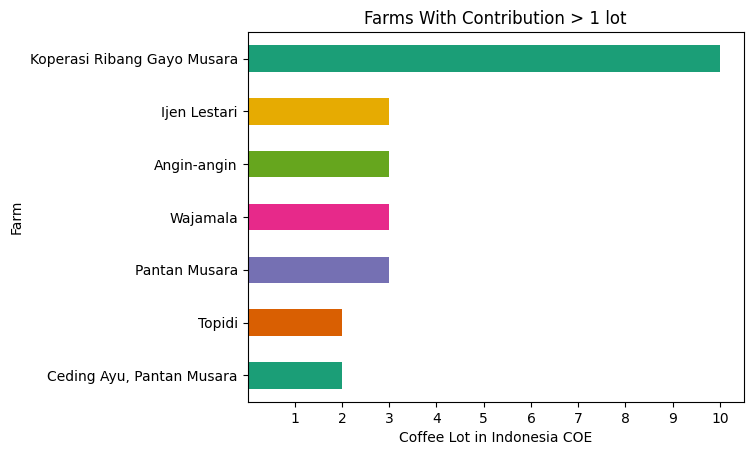

In [18]:
# Count the occurrences of each farm and filter the farms with more than one occurrence
farm_multi = df['Farm'].value_counts()[df['Farm'].value_counts()>1].sort_values()

# Plot the data
farm_multi.plot(kind='barh', xlabel='Coffee Lot in Indonesia COE', xticks=[1,2,3,4,5,6,7,8,9,10],
                color=sns.palettes.mpl_palette('Dark2'), 
                title='Farms With Contribution > 1 lot')

[Text(0, 0, '879.64'),
 Text(0, 0, '898.03'),
 Text(0, 0, '908.3'),
 Text(0, 0, '1026.03'),
 Text(0, 0, '1058.2'),
 Text(0, 0, '1104.2'),
 Text(0, 0, '1355.84'),
 Text(0, 0, '1494.73'),
 Text(0, 0, '1579.48'),
 Text(0, 0, '7172')]

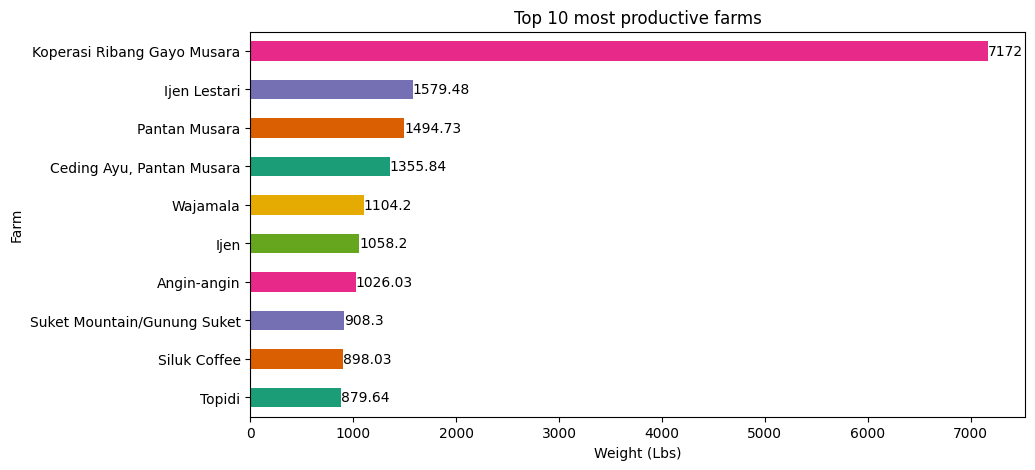

In [19]:
# Calculate the top 10 total production by farm
total_production = df.groupby('Farm')['Weight (Lbs)'].sum().sort_values().tail(10)

# Plot the data
ax = total_production.plot(kind='barh', xlabel='Weight (Lbs)', figsize=(10,5),
                color=sns.palettes.mpl_palette('Dark2'), 
                title='Top 10 most productive farms')

ax.bar_label(ax.containers[0])

[Text(0, 0, '16012.2'),
 Text(0, 0, '18736.3'),
 Text(0, 0, '19064.4'),
 Text(0, 0, '21723.6'),
 Text(0, 0, '24363.8'),
 Text(0, 0, '26735.9'),
 Text(0, 0, '27628.4'),
 Text(0, 0, '62971'),
 Text(0, 0, '88531.3'),
 Text(0, 0, '114386')]

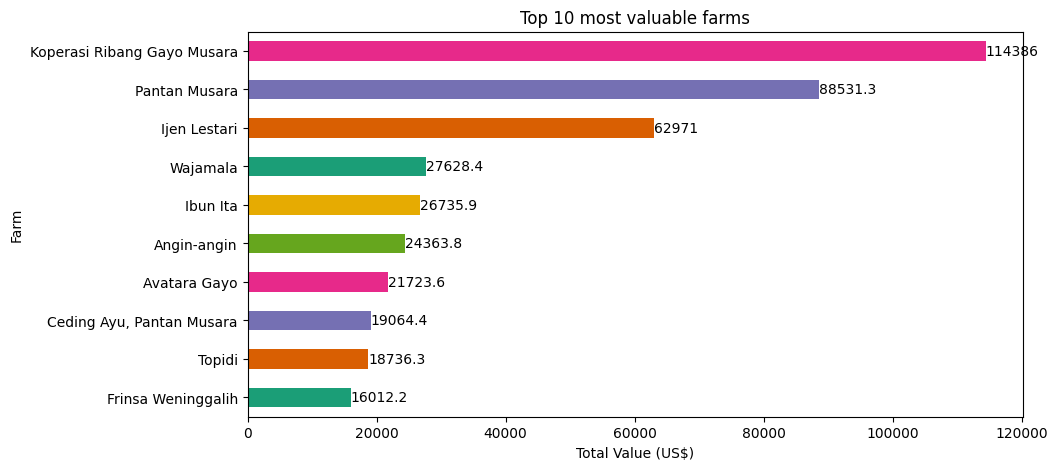

In [20]:
# Calculate the top 10 total value by farm
total_production = df.groupby('Farm')['Total Value (US$)'].sum().sort_values().tail(10)

# Plot the data
ax = total_production.plot(kind='barh', xlabel='Total Value (US$)', figsize=(10,5),
                color=sns.palettes.mpl_palette('Dark2'), 
                title='Top 10 most valuable farms')

ax.bar_label(ax.containers[0])

[Text(0, 0, '89.15'),
 Text(0, 0, '89.21'),
 Text(0, 0, '89.27'),
 Text(0, 0, '89.29'),
 Text(0, 0, '89.35'),
 Text(0, 0, '89.47'),
 Text(0, 0, '89.59'),
 Text(0, 0, '89.85'),
 Text(0, 0, '90.06'),
 Text(0, 0, '90.52')]

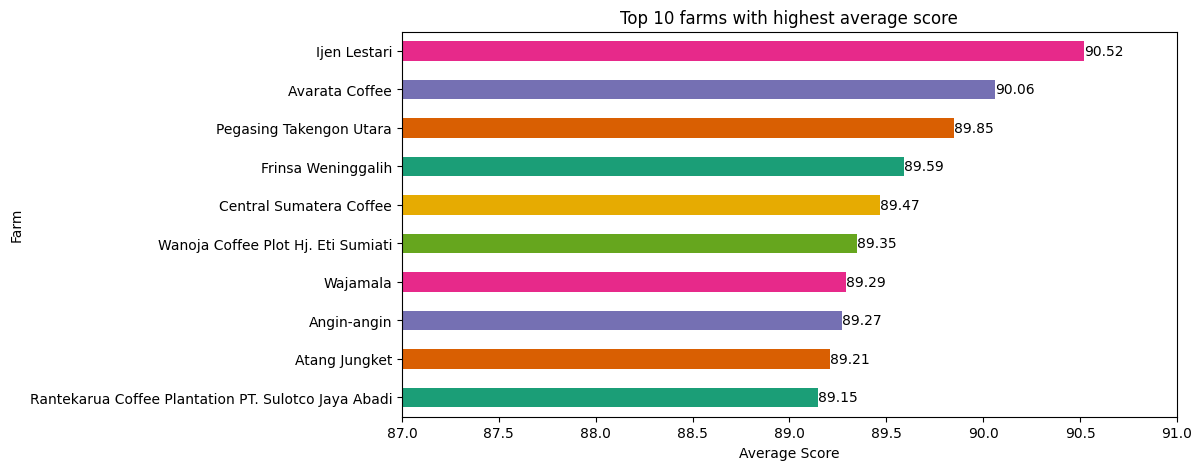

In [68]:
# Calculate the top 10 average score by farm
avg_score = df.groupby('Farm')['Score'].mean().round(2).sort_values().tail(10)

# Plot the data
ax = avg_score.plot(kind='barh', xlabel='Average Score', figsize=(10,5), xlim=[87, 91],
                color=sns.palettes.mpl_palette('Dark2'), 
                title='Top 10 farms with highest average score')

ax.bar_label(ax.containers[0])

## The Column "Farmer"

### Unique values evaluation.

In [22]:
print(f"There are {df['Farmer'].nunique()} farmers that contribute to the Indonesia COE, which are: \n\n{df['Farmer'].unique()}")

There are 57 farmers that contribute to the Indonesia COE, which are: 

['Dilen Ali Gogo' 'Ita Rosita' 'Roberto Bagus Syahputra' 'Dandy Darmawan'
 'Yudi' 'Triyono' 'Drs Hamdan' 'Ahmad Vansyu' 'Daeng Halim'
 'Dinul Haq Sabyli' 'Daeng Balengkang' 'Samuel Karundeng' 'Muhammad Irwan'
 'Saeful Hadi' 'Wardoyo' 'Sabarwin' 'I Wayan Parum' 'Indo Pole'
 'Gravfarm Indonesia' 'Enung Sumartini' 'Setra Yuhana' 'Santoso' 'Zakiah'
 'Dasimah Hakim' 'Marselina Walu' 'Mukhlis M' 'Bahagia Ginting'
 'PT. Biji Kopi Internusa' 'Yasmin Nabila Salsabila' 'Dimas Apriandi'
 'Christian' 'Asman Arianto' 'Fahman Yoga' 'Hakem Murtada'
 'Abdul Aziz Thohari' 'Ahmad Abi Sodik' 'Eriyani N' 'Dandy Dharmawan'
 'Hendra Maulizar' 'Rudi Suwito' 'Irwandi' 'Yurda' 'Victor Nopriansyah'
 'Yolan Tirta' 'Enzo Sauqi Hutabarat' 'Hj. Eti Sumiati' 'Syafjurian Putra'
 'Fauziah' 'Diki Wahyudin' 'I Wayan Suparta' 'Nurdianingsih'
 'Eka Teguh Kurniawan' 'Satrea Amambi' 'Zainal Arifin' 'Marjan'
 'Supriyanto' 'Ferri Padli']


Most of the names above are familiar as individual names in Indonesia, except three, which are "Indo Pole", "Gravfarm Indonesia", and "PT. Biji Kopi Internusa".

Let's check the data that contains those names.

#### Checking unusual names.

In [23]:
unusual_names = df[df['Farmer'].str.contains('pole|gravfarm|internusa', case=False, na=False)]
unusual_names[['Year', 'Farm', 'Farmer', 'Region']]

,Year,Farm,Farmer,Region
17,2021,Angin-angin,Indo Pole,Sulawesi Selatan
18,2021,Gravfarm Sukaratu,Gravfarm Indonesia,Jawa Barat
28,2022,Pegasing Takengon Utara,PT. Biji Kopi Internusa,Aceh


It makes sense that "Indo Pole" is an individual name, while "Gravfarm Indonesia" and "PT. Biji Kopi Internusa" most likely refer to a group's or company's name; we will verify it later.

#### Checking the farmers with multiple farms. 

In [24]:
# Group by 'Farmer' and count unique 'Farm' values
farmer_farm_counts = df.groupby('Farmer')['Farm'].nunique()

# Filter to get farmers associated with more than one farm
farmers_multiple_farms = farmer_farm_counts[farmer_farm_counts > 1].index

# Filter the original DataFrame to include only these farmers
df_multiple_farms = df[df['Farmer'].isin(farmers_multiple_farms)]

# Select and sort the relevant columns
df_multiple_farms[['Farmer', 'Farm', 'Year']].sort_values(by='Farmer')

,Farmer,Farm,Year
38,Abdul Aziz Thohari,Koerintji Barokah Group,2022
72,Abdul Aziz Thohari,Rukun Saudara Farm,2023
41,Dandy Dharmawan,Ijen,2022
50,Dandy Dharmawan,Ijen Lestari,2023
49,Dandy Dharmawan,Ijen Lestari,2023
34,Dilen Ali Gogo,Koperasi Ribang Gayo Musara,2022
0,Dilen Ali Gogo,Pantan Musara,2021
36,Drs Hamdan,"Ceding Ayu, Pantan Musara",2022
6,Drs Hamdan,Avatara Gayo,2021
42,Hendra Maulizar,Avatara Coffee,2022


Most of the names listed above are already detected in the evaluation of column "Farm", the new findings are: "Abdul Aziz Thohari", "Drs Hamdan", "Ita Rosita", and "Triyono". 

These farmers are associated with the distinct different farms in the different years. 

Perhaps they moved to work on different farms or just the naming inconsistensies.

### Brief evaluation with the numeric columns.

<Axes: title={'center': 'The farmers that contribute more than 1 lot'}, xlabel='Coffee Lot in Indonesia COE', ylabel='Farmer'>

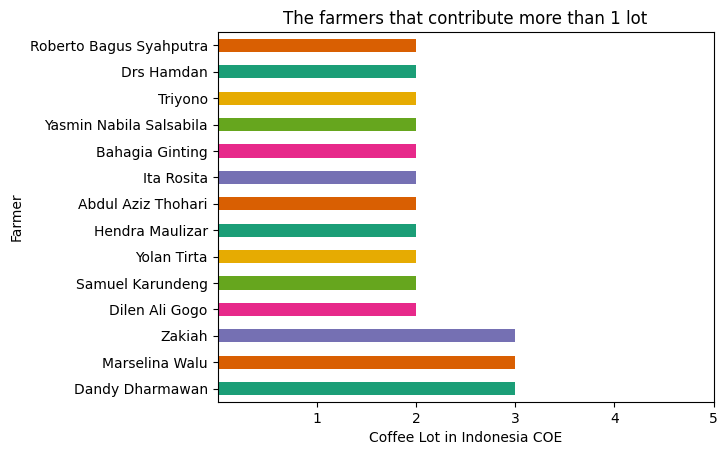

In [25]:
# Calculate and filter the farmers with more than one contribution
farmer_multi = df['Farmer'].value_counts()[df['Farmer'].value_counts()>1]

# Plot the data
farmer_multi.plot(kind='barh', xlabel='Coffee Lot in Indonesia COE', xticks=[1,2,3,4,5],
                color=sns.palettes.mpl_palette('Dark2'), 
                title='The farmers that contribute more than 1 lot')

[Text(0, 0, '1042.79'),
 Text(0, 0, '1049.4'),
 Text(0, 0, '1104.2'),
 Text(0, 0, '1144.68'),
 Text(0, 0, '1173.39'),
 Text(0, 0, '1183.62'),
 Text(0, 0, '1256.63'),
 Text(0, 0, '1371.27'),
 Text(0, 0, '1846.22'),
 Text(0, 0, '1971.32')]

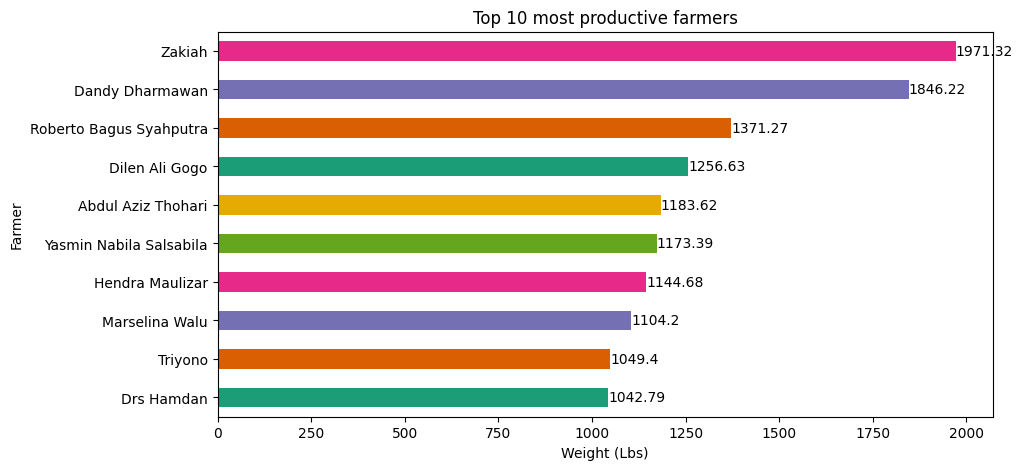

In [26]:
# Calculate the top 10 total production by farmer
total_production = df.groupby('Farmer')['Weight (Lbs)'].sum().sort_values().tail(10)

# Plot the data
ax = total_production.plot(kind='barh', xlabel='Weight (Lbs)', figsize=(10,5),
                color=sns.palettes.mpl_palette('Dark2'), 
                title='Top 10 most productive farmers')

ax.bar_label(ax.containers[0])

[Text(0, 0, '21909.3'),
 Text(0, 0, '27628.4'),
 Text(0, 0, '27859.4'),
 Text(0, 0, '28709'),
 Text(0, 0, '29200.6'),
 Text(0, 0, '33020.6'),
 Text(0, 0, '33234.5'),
 Text(0, 0, '45529.8'),
 Text(0, 0, '45799.5'),
 Text(0, 0, '50389.2')]

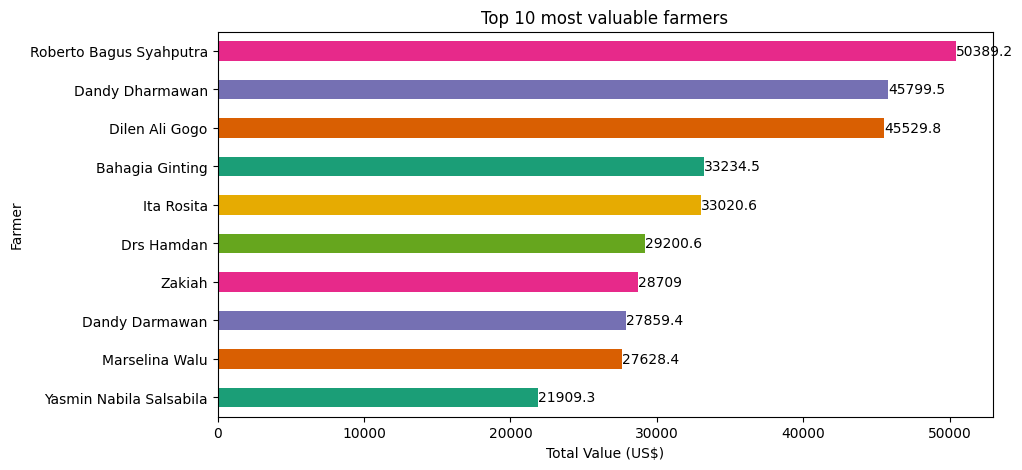

In [27]:
# Calculate the top 10 total value by farmer
total_value = df.groupby('Farmer')['Total Value (US$)'].sum().sort_values().tail(10)

# Plot the data
ax = total_value.plot(kind='barh', xlabel='Total Value (US$)', figsize=(10,5),
                color=sns.palettes.mpl_palette('Dark2'), 
                title='Top 10 most valuable farmers')

ax.bar_label(ax.containers[0])

[Text(0, 0, '88.91'),
 Text(0, 0, '89.15'),
 Text(0, 0, '89.21'),
 Text(0, 0, '89.2867'),
 Text(0, 0, '89.35'),
 Text(0, 0, '89.47'),
 Text(0, 0, '89.85'),
 Text(0, 0, '90.06'),
 Text(0, 0, '90.1467'),
 Text(0, 0, '90.59')]

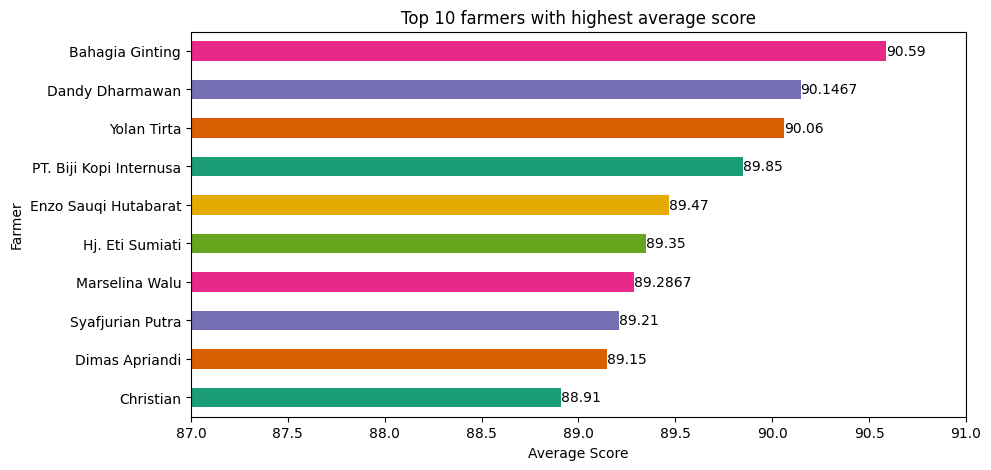

In [28]:
# Calculate the top 10 average score by farmer
avg_score = df.groupby('Farmer')['Score'].mean().sort_values().tail(10)

# Plot the data
ax = avg_score.plot(kind='barh', xlabel='Average Score', figsize=(10,5), xlim=[87, 91],
                color=sns.palettes.mpl_palette('Dark2'), 
                title='Top 10 farmers with highest average score')

ax.bar_label(ax.containers[0])

## The column "Region"

### Unique values evaluation.

In [29]:
print(f"There are {df['Region'].nunique()} provinces that participate in the Indonesia COE, which are: \n\n{df['Region'].unique()}")

There are 7 provinces that participate in the Indonesia COE, which are: 

['Aceh' 'Jawa Barat' 'Jawa Timur' 'Jambi' 'Sulawesi Selatan' 'Bali' 'NTT']


Let's check the farms in each province.

In [30]:
# Group by 'Region' and get the unique farms associated with each region
region_farms = df.groupby('Region')['Farm'].unique().reset_index()
region_farms.explode('Farm').reset_index(drop=True)

,Region,Farm
0,Aceh,Pantan Musara
1,Aceh,Avatara Gayo
2,Aceh,Sukaramai
3,Aceh,Bukit Sama
4,Aceh,Koperasi Ribang Gayo Musara
5,Aceh,Pegasing Takengon Utara
6,Aceh,Panangan Mata Takengon Utara
7,Aceh,Terang Ulen
8,Aceh,"Ceding Ayu, Pantan Musara"
9,Aceh,Renggali


In the event that there are any accuracy concerns, the coffee specialist will subsequently review the aforementioned list.

### Brief evaluation with the numeric columns.

[Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '16'),
 Text(0, 0, '32')]

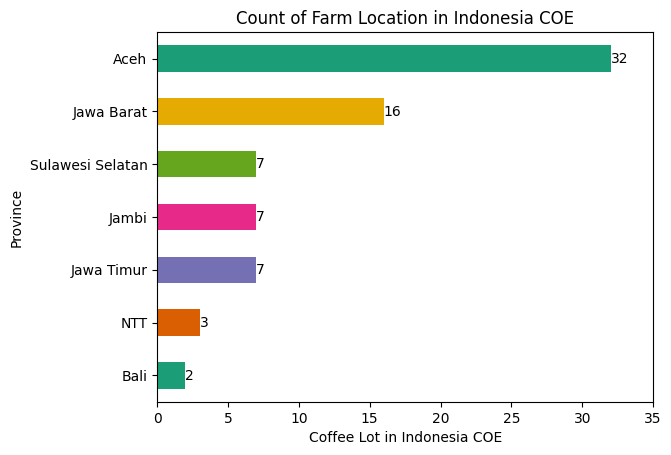

In [31]:
# Calculate the counts of each region
region_multi = df['Region'].value_counts().sort_values()

# Plot the data
ax = region_multi.plot(kind='barh', xlabel='Coffee Lot in Indonesia COE', ylabel='Province', 
                    xlim=[0, 35], color=sns.palettes.mpl_palette('Dark2'), 
                    title='Count of Farm Location in Indonesia COE')

ax.bar_label(ax.containers[0])

[Text(0, 0, '1000.9'),
 Text(0, 0, '1104.2'),
 Text(0, 0, '2940.17'),
 Text(0, 0, '3787.28'),
 Text(0, 0, '4430.04'),
 Text(0, 0, '8194.36'),
 Text(0, 0, '20095.5')]

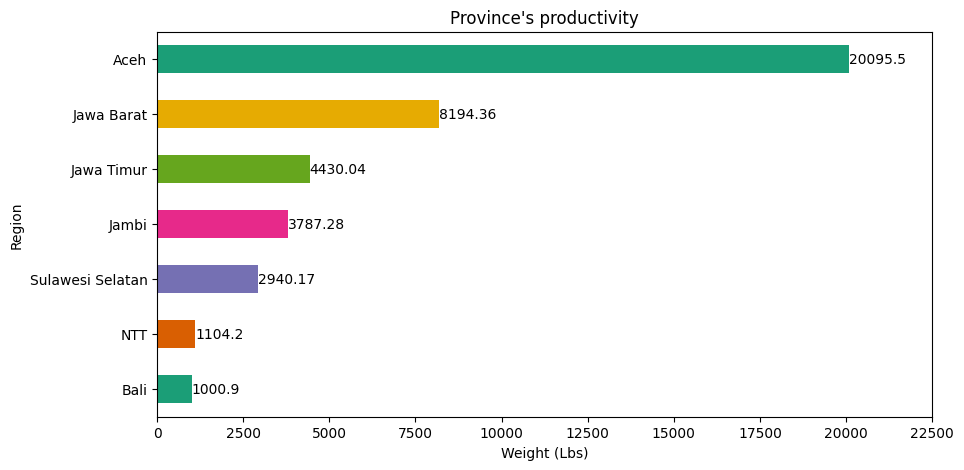

In [32]:
# Calculate the total production by region
total_production = df.groupby('Region')['Weight (Lbs)'].sum().sort_values()

# Plot the data
ax = total_production.plot(kind='barh', xlabel='Weight (Lbs)', figsize=(10,5),
                xlim=[0,22500], color=sns.palettes.mpl_palette('Dark2'), 
                title="Province's productivity")

ax.bar_label(ax.containers[0])

[Text(0, 0, '13078.7'),
 Text(0, 0, '27628.4'),
 Text(0, 0, '57350.7'),
 Text(0, 0, '64581.2'),
 Text(0, 0, '101232'),
 Text(0, 0, '162587'),
 Text(0, 0, '370133')]

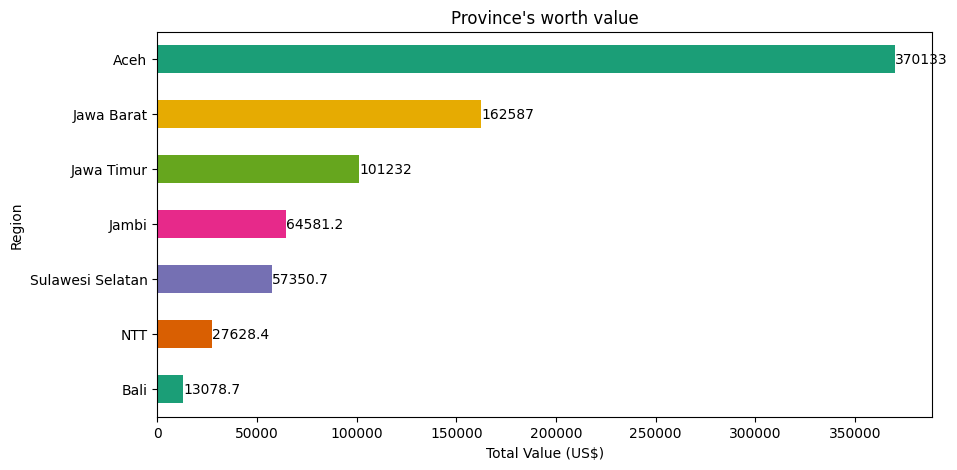

In [33]:
# Calculate the total value by region
total_value = df.groupby('Region')['Total Value (US$)'].sum().sort_values()

# Plot the data
ax = total_value.plot(kind='barh', xlabel='Total Value (US$)', figsize=(10,5),
                color=sns.palettes.mpl_palette('Dark2'), 
                title="Province's worth value")

ax.bar_label(ax.containers[0])

[Text(0, 0, '87.54'),
 Text(0, 0, '87.86'),
 Text(0, 0, '88.1'),
 Text(0, 0, '88.36'),
 Text(0, 0, '88.77'),
 Text(0, 0, '88.92'),
 Text(0, 0, '89.29')]

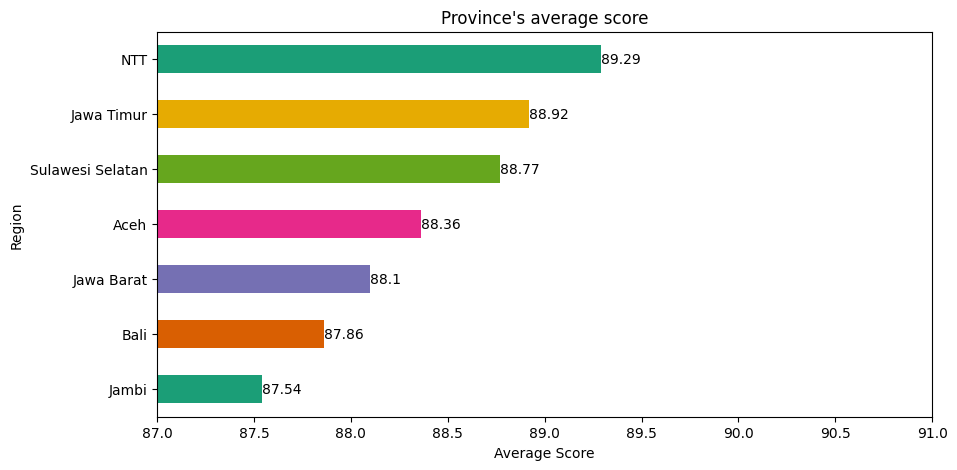

In [69]:
# Calculate the average score by region
avg_score = df.groupby('Region')['Score'].mean().round(2).sort_values()

# Plot the data
ax = avg_score.plot(kind='barh', xlabel='Average Score', figsize=(10,5), xlim=[87, 91],
                color=sns.palettes.mpl_palette('Dark2'), 
                title="Province's average score")

ax.bar_label(ax.containers[0])

## The column "Process".


This column refers to the post-harvesting process.

Once harvested, the coffee cherries need to be processed to extract the beans. There are two main methods of processing:
- Dry Processing: This is the oldest method. Cherries are spread out in the sun to dry. They are regularly turned over to prevent spoilage. Once dried, the outer layers are removed to get to the beans inside.
- Wet Processing: In this method, the cherries are pulped to remove the outer skin. The beans are then fermented in water for a certain period of time to remove the mucilage (a sticky layer). After fermentation, the beans are washed and dried.

Regardless of the processing method, the beans need to be thoroughly dried to a specific moisture level (usually about 10–12%). This can be done in the sun or using mechanical dryers. Proper drying is crucial to prevent mold and ensure quality.

After drying, the beans undergo the hulling process, which involves removing the parchment layer (in the case of wet-processed coffee) or the dried husk (in the case of dry-processed coffee).

The beans are then graded and sorted by size, weight, and color. This ensures that only the best-quality beans are selected for roasting. Defective beans are removed at this stage.

The sorted and graded beans, now called "green coffee," are packed in large sacks (usually a 60-kg size) and ready to be sold.

### Unique values evaluation

In [35]:
print(f"There are {df['Process'].nunique()} post-harvesting process in the Indonesia COE, which are: \n\n{df['Process'].unique()}")

There are 14 post-harvesting process in the Indonesia COE, which are: 

['Honey' 'Natural' 'Washed' 'Wet Hull' 'Anaerobic Natural' 'Wet Hulled'
 'Carbonic Maceration Honey' 'Lactic Natural'
 'Carbonic Maceration Natural' 'Dry Hulled' 'Honey Anaerobic'
 'Honey double fermentation' 'Mossto Natural' 'Honey Caramella']


From those processes listed above, the classic ones are:
- "Natural" comes from the dry processing.
- "Washed" comes from the wet processing.
- "Honey", some coffee experts classify this as a product from the semi-dry processing.

Meanwhile, there are some farmers who divide the wet process into "Dry Hulled" and "Wet Hulled", the latter of which is typical coffee processing only in Indonesia.

While the rest is a modification and development of classic processing.

#### Wet Hull or Wet Hulled

In [36]:
wet_hull = df[df['Process'].str.contains('wet', case=False, na=False)]
wet_hull[['Year', 'Process', 'Farm', 'Farmer', 'Region']]

,Year,Process,Farm,Farmer,Region
15,2021,Wet Hull,Sukaramai,Sabarwin,Aceh
23,2021,Wet Hull,Bukit Sama,Dasimah Hakim,Aceh
35,2022,Wet Hulled,Terang Ulen,Fahman Yoga,Aceh
37,2022,Wet Hulled,Renggali,Hakem Murtada,Aceh
70,2023,Wet Hulled,Siluk Coffee,Marjan,Aceh


For the sake of consistency, the "Wet Hull" will be converted to "Wet Hulled" later.

### Brief evaluation with the numeric columns.

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '9'),
 Text(0, 0, '15'),
 Text(0, 0, '28')]

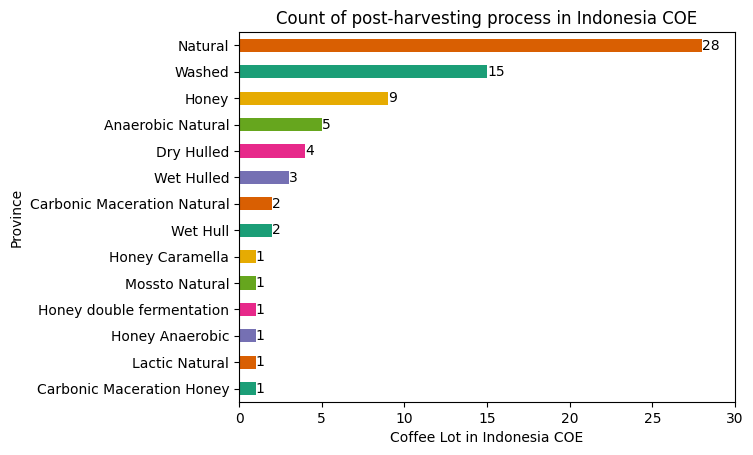

In [37]:
process_multi = df['Process'].value_counts().sort_values()

ax = process_multi.plot(kind='barh', xlabel='Coffee Lot in Indonesia COE', ylabel='Province', 
                    xlim=[0, 30], color=sns.palettes.mpl_palette('Dark2'), 
                    title='Count of post-harvesting process in Indonesia COE')

ax.bar_label(ax.containers[0])

[Text(0, 0, '608.65'),
 Text(0, 0, '621.44'),
 Text(0, 0, '788.02'),
 Text(0, 0, '862.01'),
 Text(0, 0, '1781.02'),
 Text(0, 0, '2154.67'),
 Text(0, 0, '3637.61'),
 Text(0, 0, '4793.41'),
 Text(0, 0, '8617.85'),
 Text(0, 0, '15367.1')]

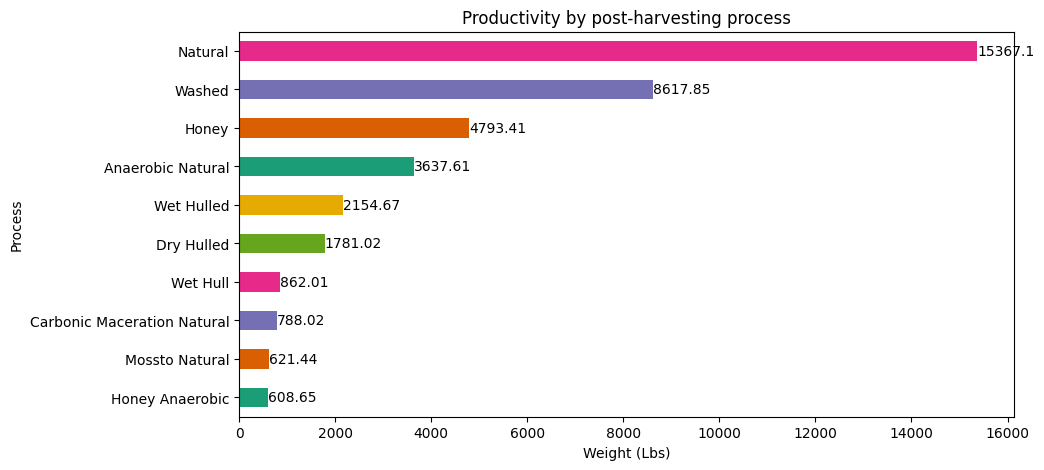

In [38]:
total_production = df.groupby('Process')['Weight (Lbs)'].sum().sort_values().tail(10)

ax = total_production.plot(kind='barh', xlabel='Weight (Lbs)', figsize=(10,5),
                color=sns.palettes.mpl_palette('Dark2'), 
                title="Productivity by post-harvesting process")

ax.bar_label(ax.containers[0])

[Text(0, 0, '9649.27'),
 Text(0, 0, '11964.5'),
 Text(0, 0, '19377.6'),
 Text(0, 0, '29791.2'),
 Text(0, 0, '30305.5'),
 Text(0, 0, '35111.6'),
 Text(0, 0, '56264'),
 Text(0, 0, '105487'),
 Text(0, 0, '167917'),
 Text(0, 0, '305043')]

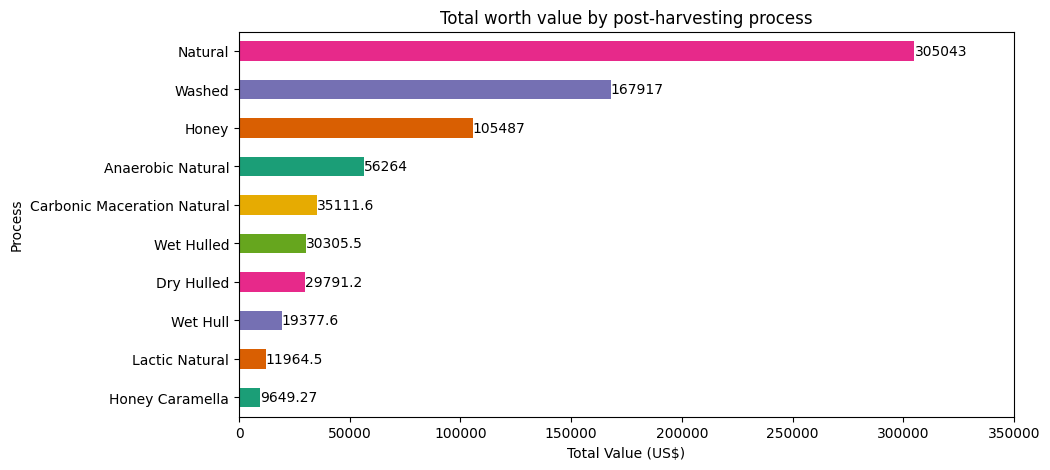

In [39]:
total_value = df.groupby('Process')['Total Value (US$)'].sum().sort_values().tail(10)

ax = total_value.plot(kind='barh', xlabel='Total Value (US$)', figsize=(10,5),
                xlim  =[0, 350000], color=sns.palettes.mpl_palette('Dark2'), 
                title="Total worth value by post-harvesting process")

ax.bar_label(ax.containers[0])

[Text(0, 0, '87.74'),
 Text(0, 0, '87.7867'),
 Text(0, 0, '87.85'),
 Text(0, 0, '87.866'),
 Text(0, 0, '87.97'),
 Text(0, 0, '88.15'),
 Text(0, 0, '88.4514'),
 Text(0, 0, '88.9422'),
 Text(0, 0, '89.175'),
 Text(0, 0, '91.41')]

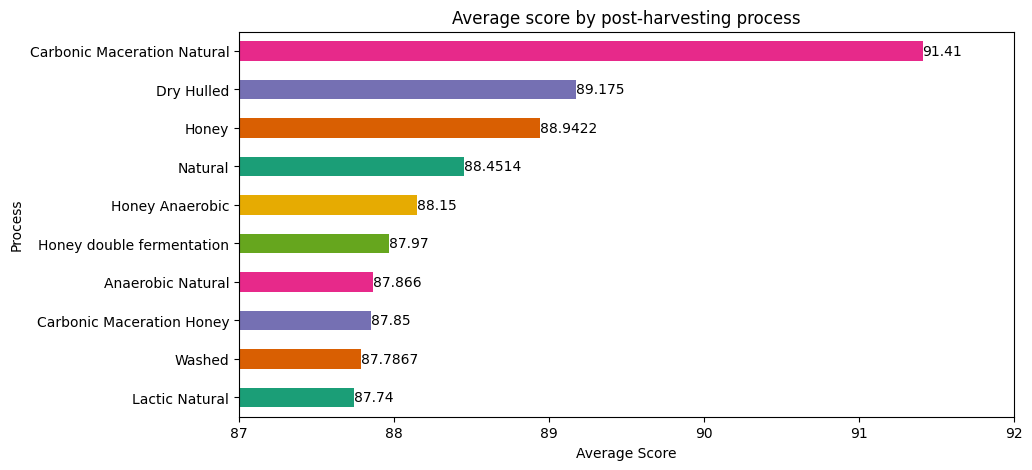

In [40]:
avg_score = df.groupby('Process')['Score'].mean().sort_values().tail(10)

ax = avg_score.plot(kind='barh', xlabel='Average Score', figsize=(10,5), xlim=[87, 92],
                color=sns.palettes.mpl_palette('Dark2'), 
                title="Average score by post-harvesting process")

ax.bar_label(ax.containers[0])

## The columns "Variety"

### Unique values evaluation

In [41]:
vars = ['Variety_1', 'Variety_2', 'Variety_3', 'Variety_4']

# Select the columns
combined_vars = df[vars]

# Get unique values
unique_vars = pd.unique(combined_vars.values.ravel())
unique_vars = unique_vars[pd.notnull(unique_vars)]

print(f"There are {len(unique_vars)} coffee varieties that contribute to the Indonesia COE, which are: \n\n{unique_vars}")

There are 26 coffee varieties that contribute to the Indonesia COE, which are: 

['Ateng' 'Gayo 1' 'P88' 'Sigararutang' 'USDA' 'Colombia Brazil' 'Kartika'
 'S-795' 'Andungsari' 'Abyssinia' 'Typica' 'Cobra' 'Catuai' 'Lini S 795'
 'Catimor' 'P-88' 'Yellow Bourbon' 'Bourbon' 'Tim-Tim' 'Caturra'
 'Other (unspecified)' 'USDA 762' 'Lini S-795' 'Gayo 3' 'Kopyol'
 'Red Bourbon']


#### The ambiguous values

There are some values that suspiciously have the same meaning/definition, which are:
- 'P88' and 'P-88'
- 'S-795', 'Lini S 795', and 'Lini S-795'
- 'USDA' and 'USDA 762'

Let's check their appeaarance counts in the dataset.

In [42]:
# Count occurrences of specific values in variety columns
p88_count = df[vars].apply(lambda x: x.eq('P88').sum()).sum()
p_88_count = df[vars].apply(lambda x: x.eq('P-88').sum()).sum()

# Display the counts
print(f"The value 'P88' appears {p88_count} times.\nThe value 'P-88' appears {p_88_count} times.")

The value 'P88' appears 4 times.
The value 'P-88' appears 17 times.


In [43]:
# Count occurrences of specific values in variety columns
s795_count = df[vars].apply(lambda x: x.eq('S-795').sum()).sum()
linis795_count = df[vars].apply(lambda x: x.eq('Lini S 795').sum()).sum()
linis_795_count = df[vars].apply(lambda x: x.eq('Lini S-795').sum()).sum()

# Display the counts
print(f"The value 'S-795' appears {s795_count} times.\nThe value 'Lini S 795' appears {linis795_count} times.\nThe value 'Lini S-795' appears {linis_795_count} times. ")

The value 'S-795' appears 20 times.
The value 'Lini S 795' appears 1 times.
The value 'Lini S-795' appears 2 times. 


In [44]:
# Count occurrences of specific values in variety columns
usda_count = df[vars].apply(lambda x: x.eq('USDA').sum()).sum()
usda762_count = df[vars].apply(lambda x: x.eq('USDA 762').sum()).sum()

# Display the counts
print(f"The value 'USDA' appears {usda_count} times.\nThe value 'USDA 762' appears {usda762_count} times.")

The value 'USDA' appears 4 times.
The value 'USDA 762' appears 2 times.


#### "Colombia Brazil" variety

I am uncertain that this is an actual coffee variety.

We will confirm it later in data validation stage.

In [45]:
filtered_df = df[df[vars].apply(lambda x: x.eq('Colombia Brazil').any(), axis=1)]

filtered_df

,Year,Rank,Score,Farm,Farmer,Region,Process,Variety_1,Variety_2,Variety_3,Variety_4,Weight (Lbs),High Bid (US$),Total Value (US$),Buyer
3,2021,4,88.75,Ijen Lestari,Dandy Darmawan,Jawa Timur,Natural,USDA,Colombia Brazil,NaN,NaN,791.46,35.2,27859.392,SUPREMO COFFEE


### Brief evaluation with the numeric columns.

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '11'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '24'),
 Text(0, 0, '32')]

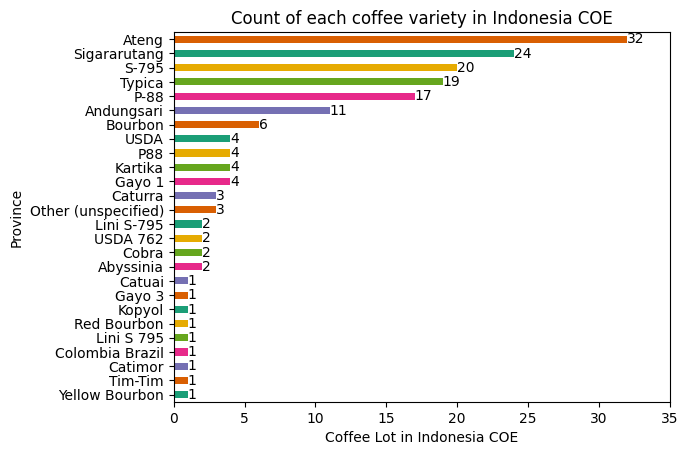

In [46]:
vars = pd.concat([df['Variety_1'], df['Variety_2'], df['Variety_3'], df['Variety_4']])

variety_multi = vars.value_counts().sort_values()

ax = variety_multi.plot(kind='barh', xlabel='Coffee Lot in Indonesia COE', ylabel='Province', 
                    xlim=[0, 35], color=sns.palettes.mpl_palette('Dark2'), 
                    title='Count of each coffee variety in Indonesia COE')

ax.bar_label(ax.containers[0])

[Text(0, 0, '2300.37'),
 Text(0, 0, '2415.42'),
 Text(0, 0, '2884.16'),
 Text(0, 0, '4690.76'),
 Text(0, 0, '5748.87'),
 Text(0, 0, '9855.57'),
 Text(0, 0, '10610.1'),
 Text(0, 0, '11097'),
 Text(0, 0, '12523.8'),
 Text(0, 0, '19793.7')]

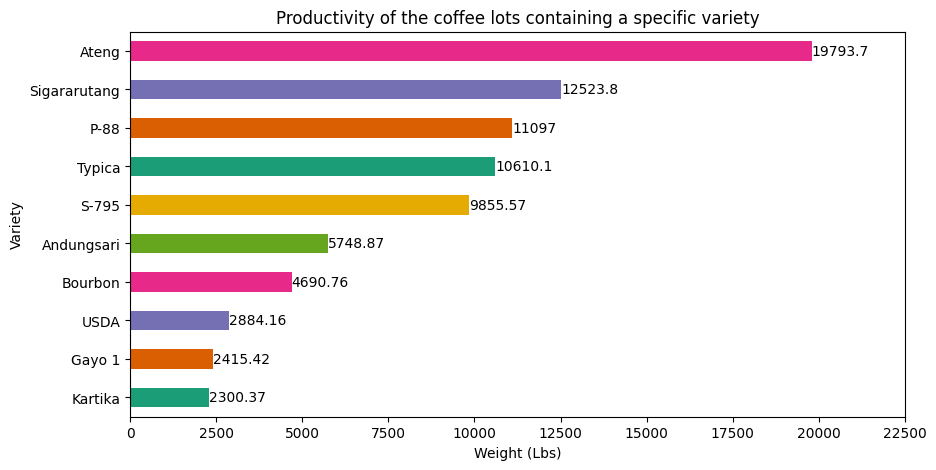

In [47]:
# Make an additional DataFrame to assist the analysis
assist_df = df.melt(id_vars=['Weight (Lbs)'], value_vars=['Variety_1', 'Variety_2', 'Variety_3', 'Variety_4'],
                    var_name='Variety_Column', value_name='Variety')

# Drop rows with NaN values in the 'Variety' column
assist_df = assist_df.dropna(subset=['Variety'])

# Calculate the total production
total_production = assist_df.groupby('Variety')['Weight (Lbs)'].sum().sort_values().tail(10)

# Create the bar plot
ax = total_production.plot(kind='barh', xlabel='Weight (Lbs)', figsize=(10,5), xlim=[0,22500],
                color=sns.palettes.mpl_palette('Dark2'), 
                title="Productivity of the coffee lots containing a specific variety")

ax.bar_label(ax.containers[0])

[Text(0, 0, '57198.6'),
 Text(0, 0, '65056.6'),
 Text(0, 0, '96291.9'),
 Text(0, 0, '100727'),
 Text(0, 0, '110255'),
 Text(0, 0, '177178'),
 Text(0, 0, '180811'),
 Text(0, 0, '181398'),
 Text(0, 0, '232771'),
 Text(0, 0, '361706')]

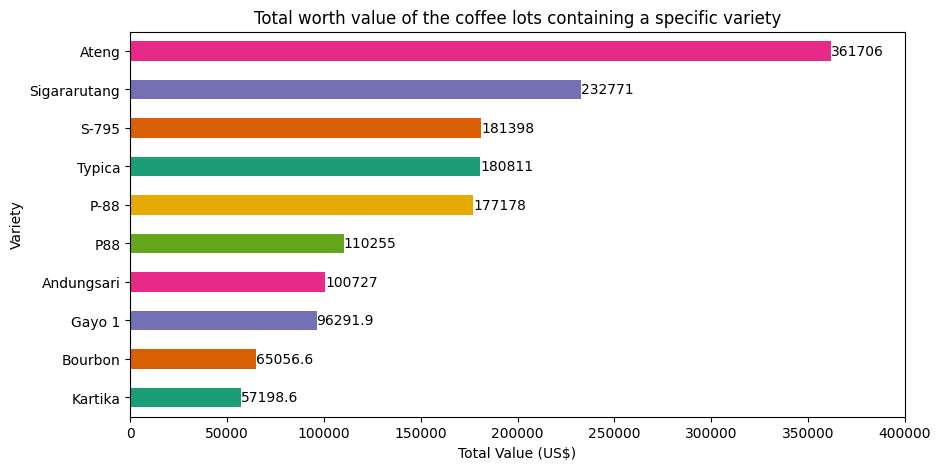

In [48]:
# Make an additional DataFrame to assist the analysis
assist_df = df.melt(id_vars=['Total Value (US$)'], value_vars=['Variety_1', 'Variety_2', 'Variety_3', 'Variety_4'],
                    var_name='Variety_Column', value_name='Variety')

# Drop rows with NaN values in the 'Variety' column
assist_df = assist_df.dropna(subset=['Variety'])

# Calculate the total value
total_value = assist_df.groupby('Variety')['Total Value (US$)'].sum().sort_values().tail(10)

# Create the bar plot
ax = total_value.plot(kind='barh', xlabel='Total Value (US$)', figsize=(10,5),
                xlim=[0, 400000], color=sns.palettes.mpl_palette('Dark2'), 
                title="Total worth value of the coffee lots containing a specific variety")

ax.bar_label(ax.containers[0])

[Text(0, 0, '88.4832'),
 Text(0, 0, '88.5435'),
 Text(0, 0, '88.7275'),
 Text(0, 0, '88.75'),
 Text(0, 0, '88.795'),
 Text(0, 0, '88.965'),
 Text(0, 0, '89.21'),
 Text(0, 0, '89.755'),
 Text(0, 0, '90.06'),
 Text(0, 0, '91.41')]

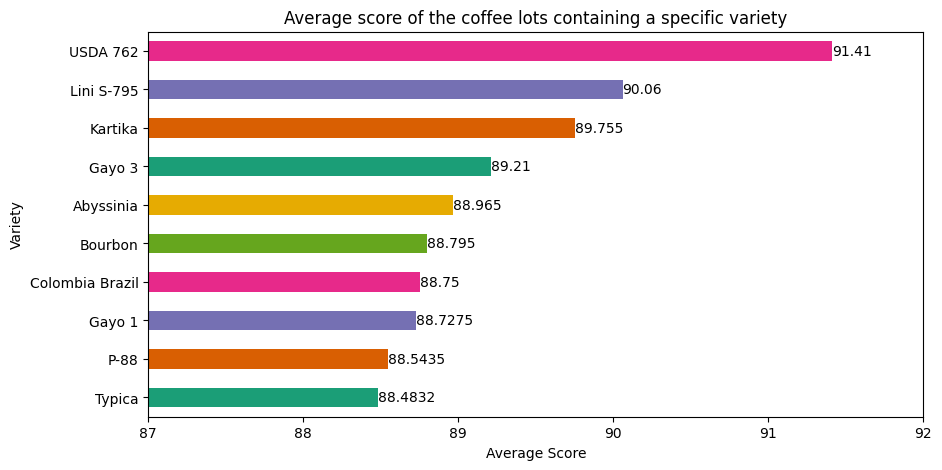

In [49]:
# Make an additional DataFrame to assist the analysis
assist_df = df.melt(id_vars=['Score'], value_vars=['Variety_1', 'Variety_2', 'Variety_3', 'Variety_4'],
                    var_name='Variety_Column', value_name='Variety')

# Drop rows with NaN values in the 'Variety' column
assist_df = assist_df.dropna(subset=['Variety'])

# Calculate the average score
avg_score = assist_df.groupby('Variety')['Score'].mean().sort_values().tail(10)

# Create the bar plot
ax = avg_score.plot(kind='barh', xlabel='Average Score', figsize=(10,5), xlim=[87, 92],
                color=sns.palettes.mpl_palette('Dark2'), 
                title="Average score of the coffee lots containing a specific variety")

ax.bar_label(ax.containers[0])

## The Column "Buyer"

In [50]:
print(f"There are {df['Buyer'].nunique()} buyers or group of buyers from all over the world that engage in the Indonesia COE, which are: \n\n{df['Buyer'].unique()}")

There are 53 buyers or group of buyers from all over the world that engage in the Indonesia COE, which are: 

['Wataru for YAMATOYA COFFEE' 'Proud Mary Coffee Roasters'
 'Terarosa (Haksan Co. Ltd)' 'SUPREMO COFFEE'
 'Latorre&Dutch (China) for Cut Hand Group（剁手咖啡群）/ Gee Coffee'
 'MARISSTELLA COFFEE, INTELLIGENTSIA, RYANS COFFEE ROASTERS'
 'Blue Bottle Coffee'
 'MUSEO Co., Ltd. // wondumyungga cafe de Jura alacarte // liike coffee'
 'Orsir Coffee Co., Ltd.'
 'Herd Coffee Roaster. CARA Instant Coffee. Beska Beans. Mokka Coffee Roaster. Alliance for Coffee Excellence. Coffee Cherry. Coffee Drxx & Bean2Cup'
 'Wataru & Co., Ltd.' 'Tashiro Coffee Co., Ltd' 'Cometeer'
 'Kopikina Coffee Roaster' 'Curve Specialty coffee Roastery'
 'TAKAMURA COFFEE ROASTERS'
 'Seng Pan Coffee. Mimosa Coffee. SCAI. Herd Coffee Roaster. Idle Hands Coffee Roasters. Mokka Coffee Roaster'
 'Luigi Lavazza S.p.A.' 'MOMOS COFFEE' 'elbgold Roestkaffee GmbH'
 'Sarutahiko Coffee Inc.' 'Wataru for Voila Coffee' 'Blooms Ltd'


This column's value is complicated because there are many groups of buyers that are written with inconsistent separators, as well as some collective buyers that come from different countries.

This case will be discussed with the coffee specialist later.

I propose to add a new column to refer to the buyer's origin country so we can track the export destination country for the Indonesia COE.

## Conclusion

The problems arise on coffee **farm** names that need to be validated are listed below:
- The farm names that contain "Musara", are they better to be considered as the same or different entity, because there are three farmers that correspond to "Pantan Musara" farm in 2021, involve again in the following year as part of "Koperasi Ribang Gayo Musara" farm.
- There are farm names that almost the same each other, "Avatara Coffee" and "Avarata Coffee", that correspond to the same farmer.
- The farm names that contain "Koerintji", are they the different farms located in the area called "Koerintji.
- The "Wanoja Coffee" farm will be revised to exclude the farmers name.
- Another farm in Jawa Barat, which one will be listed the farm name: "Frinsa Weninggalih" or "Weninggalih".
- While in Sulawesi Selatan, there is an intriguing name between the farm name "Rantekarua Coffee Plantation" or the company's name "PT. Sulotco Jaya Abadi".

The problems arise on **farmer** names that need to be validated are listed below:
- Most of the names are familiar as the individual person's name in Indonesia, except two: "Gravfarm Indonesia" and "PT. Biji Kopi Internusa".
- Still related to the problems encountered in the farm names, there are some farmers that correspond to more than one farm, which are: "Abdul Aziz Thohari", "Drs Hamdan", "Ita Rosita", and "Triyono".
- Are they actually work on the different farm in the different year or just farm naming inconsistencies on the submission process to the Indonesia COE organizer.

The problems arise on the coffee producer **region** names will be only found when both the farm and farmer names are validated and revised if necessary. In the event that there are any accuracy concerns, the coffee specialist will subsequently review the aforementioned list.

The problems arise on coffee post-harvesting **process** is the ambiguity between "Wet Hull" and "Wet Hulled", the correct term is the latter one.

The problems arise on coffee **variety** that need to be validated are listed below:
- There are three varieties that have naming inconsistensies, the correct term of each one will be decided later.
- I am uncertain about the existence "Colombia Brazil" variety.
- A new column explaining whether the lot is single-variety or multi-variety is considered for addition.

The problems arise on **buyer** that need to be validated are listed below:
- The list of buyer in the dataset is complicated because there are groups of buyers that are written with inconsistent separators, and perhaps some collective buyers come from different countries.
- A new column describing the buyer's origin country is considered for addition so we can track the export destination for the Indonesia COE.

